In [3]:
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import  numpy as np

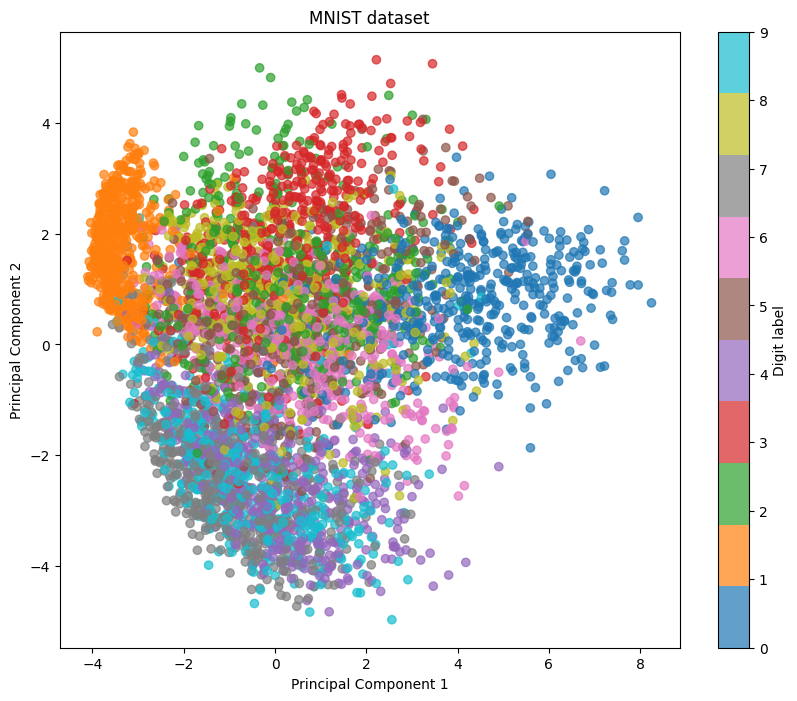

In [6]:
# load data 
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# flatten the images
x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flattened)

# plot the data
plt.figure(figsize =(10, 8))
scatter = plt.scatter(
        x_train_pca[:5000 , 0],
        x_train_pca[:5000 , 1],
        c=y_train[:5000],
        cmap="tab10",
        alpha=0.7
)

plt.colorbar(scatter, label = "Digit label")
plt.title("MNIST dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0750 - val_loss: 0.0568
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0535 - val_loss: 0.0507
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0489 - val_loss: 0.0469
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0463 - val_loss: 0.0452
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0449 - val_loss: 0.0443
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0440 - val_loss: 0.0437
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0432 - val_loss: 0.0428
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0424 - val_loss: 0.0420
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0417 - val_loss: 0.0416
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0412 - val_loss: 0.0411
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0408 - val_loss: 0.0408
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

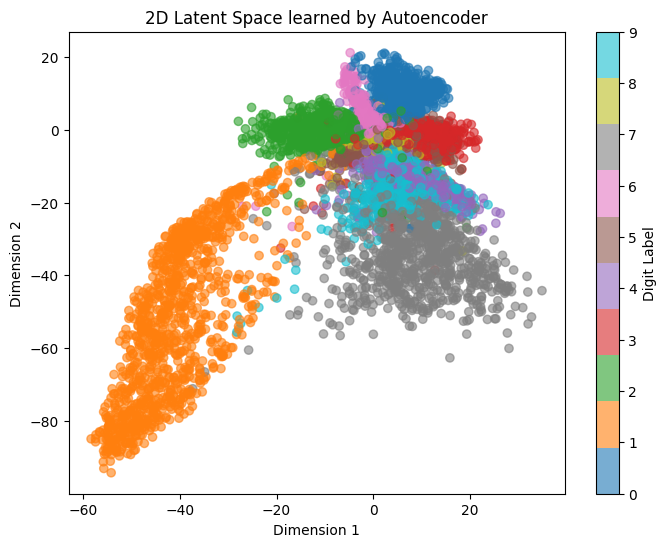

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1️⃣ تحميل البيانات
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# 2️⃣ تجهيز البيانات (Normalize + Flatten)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train_flat = x_train.reshape((len(x_train), 784))
x_test_flat = x_test.reshape((len(x_test), 784))

# 3️⃣ بناء الـ Encoder
encoding_dim = 2  # زي الـ PCA (نقلل إلى بعدين فقط)
input_layer = tf.keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded_output = layers.Dense(encoding_dim, activation='linear', name='encoder_output')(encoded)

encoder = models.Model(input_layer, encoded_output, name="Encoder")

# 4️⃣ بناء الـ Decoder
decoder_input = tf.keras.Input(shape=(encoding_dim,))
decoded = layers.Dense(64, activation='relu')(decoder_input)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded_output = layers.Dense(784, activation='sigmoid')(decoded)

decoder = models.Model(decoder_input, decoded_output, name="Decoder")

# 5️⃣ دمجهم في Autoencoder واحد
autoencoder_input = tf.keras.Input(shape=(784,))
encoded_repr = encoder(autoencoder_input)
reconstructed = decoder(encoded_repr)
autoencoder = models.Model(autoencoder_input, reconstructed, name="Autoencoder")

# 6️⃣ تجميع النموذج
autoencoder.compile(optimizer='adam', loss='mse')

# 7️⃣ التدريب
history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat)
)

# 8️⃣ الحصول على التمثيل المضغوط (latent space)
encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = decoder.predict(encoded_imgs)

# 9️⃣ عرض النتائج
plt.figure(figsize=(8,6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=_[:10000], cmap='tab10', alpha=0.6)
plt.colorbar(label="Digit Label")
plt.title("2D Latent Space learned by Autoencoder")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


Epoch 1/10
235/235 - 2s - 7ms/step - loss: 0.0730
Epoch 2/10
235/235 - 1s - 4ms/step - loss: 0.0565
Epoch 3/10
235/235 - 1s - 4ms/step - loss: 0.0525
Epoch 4/10
235/235 - 1s - 4ms/step - loss: 0.0502
Epoch 5/10
235/235 - 1s - 4ms/step - loss: 0.0489
Epoch 6/10
235/235 - 1s - 4ms/step - loss: 0.0480
Epoch 7/10
235/235 - 1s - 4ms/step - loss: 0.0472
Epoch 8/10
235/235 - 1s - 4ms/step - loss: 0.0465
Epoch 9/10
235/235 - 1s - 4ms/step - loss: 0.0460
Epoch 10/10
235/235 - 1s - 4ms/step - loss: 0.0455
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


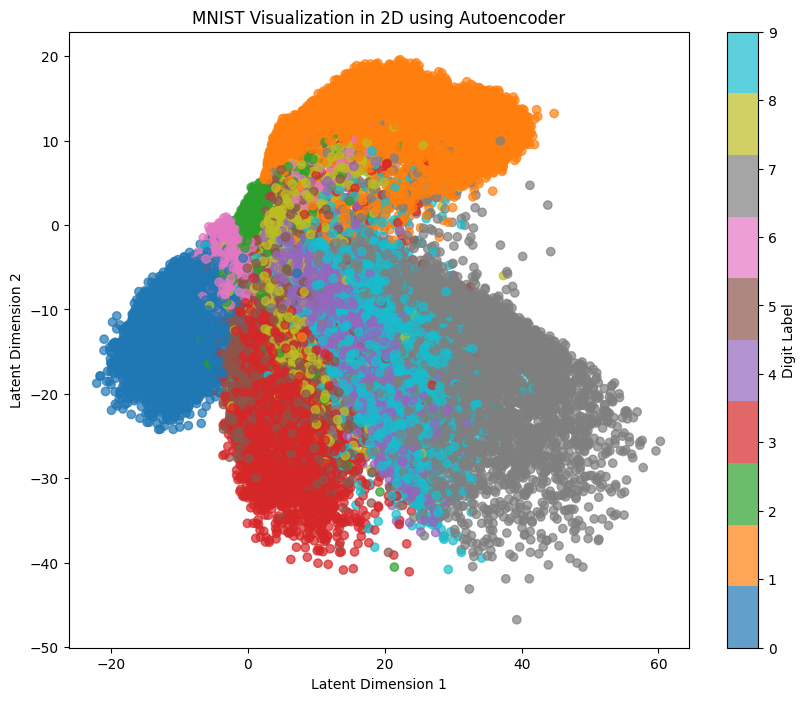

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1)     # Add channel dimension

# Define the encoder
encoder_input = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_input)
x = layers.Dense(128, activation='relu')(x)
latent = layers.Dense(2, activation=None)(x)  # 2D latent space

# Define the decoder
decoder_input = layers.Input(shape=(2,))
x = layers.Dense(128, activation='relu')(decoder_input)
x = layers.Dense(28 * 28, activation='sigmoid')(x)
decoder_output = layers.Reshape((28, 28, 1))(x)

# Create the autoencoder model
encoder = models.Model(encoder_input, latent, name="Encoder")
decoder = models.Model(decoder_input, decoder_output, name="Decoder")
autoencoder = models.Model(encoder_input, decoder(encoder(encoder_input)), name="Autoencoder")

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, verbose=2)

# Use the encoder to project data into 2D
x_train_encoded = encoder.predict(x_train)

# Visualize the 2D representations
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x_train_encoded[:, 0], 
    x_train_encoded[:, 1], 
    c=y_train, 
    cmap='tab10', 
    alpha=0.7
)
plt.colorbar(scatter, label="Digit Label")
plt.title("MNIST Visualization in 2D using Autoencoder")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()
